In [6]:
!pip install matplotlib

In [7]:
import requests
import pandas as pd
import matplotlib as mpl

Import information from weather API

In [9]:
# Use double quotes to assign your API key to private_api_key variable as a string
private_api_key = "8cd9770d46msh2bda7a77ebe30d6p10b83fjsnb5061a8acbd1"

In [10]:
# Define your parameters as a dictionary
params = {
    "lat": "4.32200",  # Find Berlin's latitude and add it here
    "lon": "-75.4052",  # Find Berlin's longitude and add it here
    "start": "2023-01-01",  # Replace with today's date
    "end": "2023-12-31"  # Replace with today's date
}

response = requests.get("https://meteostat.p.rapidapi.com/point/daily",
                       params=params,
                       headers={
                           "X-RapidAPI-Host": "meteostat.p.rapidapi.com",
                           "X-RapidAPI-Key": private_api_key # Add the private_api_key variable 
                       })

In [11]:
data=response.json()

In [12]:
df_armenia=pd.DataFrame(data["data"])

In [13]:
df_armenia

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2023-01-01,23.1,19.1,26.0,0.3,NaN,2.0,6.1,None,1017.2,None
1,2023-01-02,23.7,18.4,26.9,4.1,NaN,326.0,5.7,None,1017.1,None
2,2023-01-03,22.8,19.0,27.2,0.3,10.0,335.0,6.6,None,1017.8,None
3,2023-01-04,22.4,18.8,26.0,4.1,10.0,25.0,7.2,None,1017.2,None
4,2023-01-05,23.8,18.8,27.0,0.5,NaN,351.0,4.2,None,1016.9,None
...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,23.3,19.7,27.0,0.9,NaN,29.0,6.3,None,1016.7,None
361,2023-12-28,23.7,20.3,28.4,1.0,NaN,185.0,9.2,None,1017.1,None
362,2023-12-29,24.2,18.4,30.2,0.0,NaN,59.0,7.4,None,1018.1,None
363,2023-12-30,24.1,19.8,28.2,0.0,NaN,34.0,9.4,None,1018.5,None


In [14]:
df_armenia.drop(columns=["snow", "wpgt", "tsun"],inplace=True)

In [15]:
df_armenia

,date,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,2023-01-01,23.1,19.1,26.0,0.3,2.0,6.1,1017.2
1,2023-01-02,23.7,18.4,26.9,4.1,326.0,5.7,1017.1
2,2023-01-03,22.8,19.0,27.2,0.3,335.0,6.6,1017.8
3,2023-01-04,22.4,18.8,26.0,4.1,25.0,7.2,1017.2
4,2023-01-05,23.8,18.8,27.0,0.5,351.0,4.2,1016.9
...,...,...,...,...,...,...,...,...
360,2023-12-27,23.3,19.7,27.0,0.9,29.0,6.3,1016.7
361,2023-12-28,23.7,20.3,28.4,1.0,185.0,9.2,1017.1
362,2023-12-29,24.2,18.4,30.2,0.0,59.0,7.4,1018.1
363,2023-12-30,24.1,19.8,28.2,0.0,34.0,9.4,1018.5


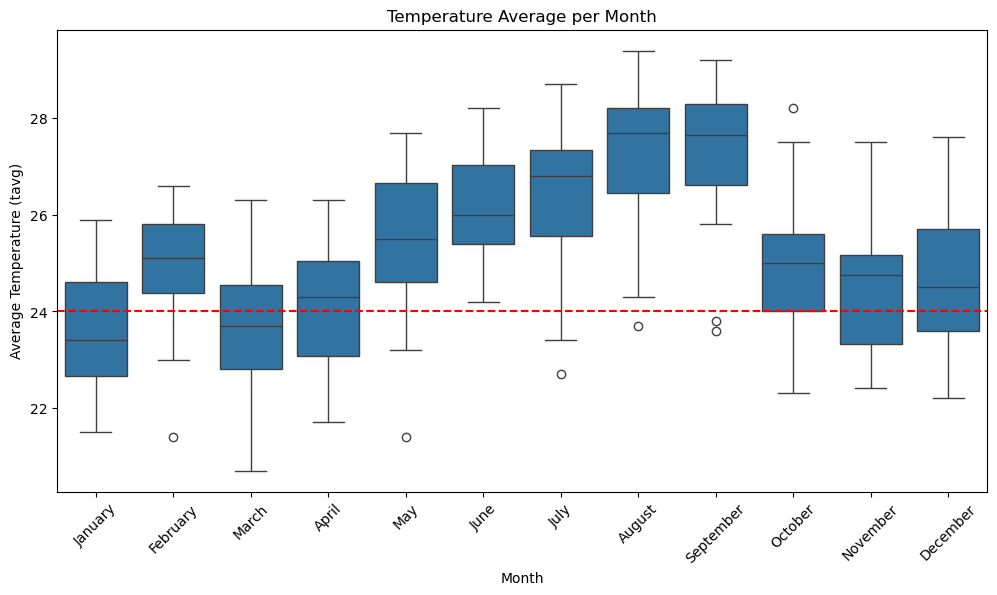

In [53]:
#boxplot of the temperature average per season
#The weather in Colombia only has two seasons: a dry season (from December to January and July to August) and a cloudy season (from April to May and October to November)
import pandas as pd

df_armenia['month'] = df_armenia['date'].dt.month_name()

import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of temperature averages grouped by month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='tavg', data=df_armenia, order=pd.date_range("2023-01-01", periods=12, freq='ME').strftime('%B'))
plt.title('Temperature Average per Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (tavg)')
plt.xticks(rotation=45)
# Cutoff lines showing over 24 degrees not optimal (under 18 not optimal but not in dataset)
plt.axhline(y=24, color='red', linestyle='--', label='24')
plt.show()

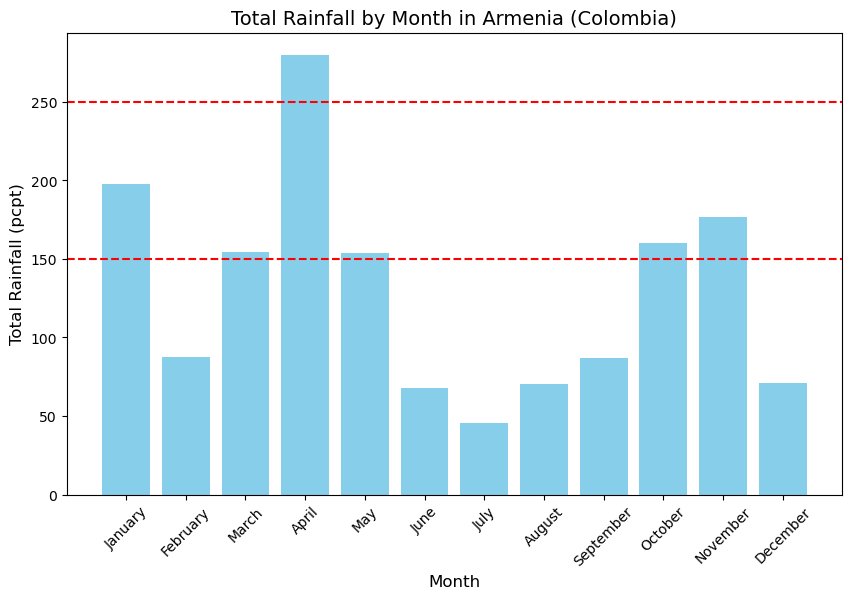

In [49]:
#group by month and put the prcp sum
monthly_rainfall = df_armenia.groupby('month')['prcp'].sum().reset_index()

# sorting by the order of months
monthly_rainfall['month'] = pd.Categorical(monthly_rainfall['month'], categories=pd.date_range("2023-01-01", periods=12, freq='ME').strftime('%B'), ordered=True)
monthly_rainfall = monthly_rainfall.sort_values('month')

# plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(monthly_rainfall['month'], monthly_rainfall['prcp'], color='skyblue')
plt.title('Total Rainfall by Month in Armenia (Colombia)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Rainfall (pcpt)', fontsize=12)
plt.xticks(rotation=45) 

#adding the two cutoff lines for the coffee 
plt.axhline(y=250, color='red', linestyle='--', label='250 cm')
plt.axhline(y=150, color='red', linestyle='--', label='150 cm')

plt.show()

C:\Users\david\AppData\Local\Temp\ipykernel_47440\667197889.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_wspd['month'] = pd.Categorical(monthly_avg_wspd['month'], categories=pd.date_range("2024-01-01", periods=12, freq='M').strftime('%B'), ordered=True)


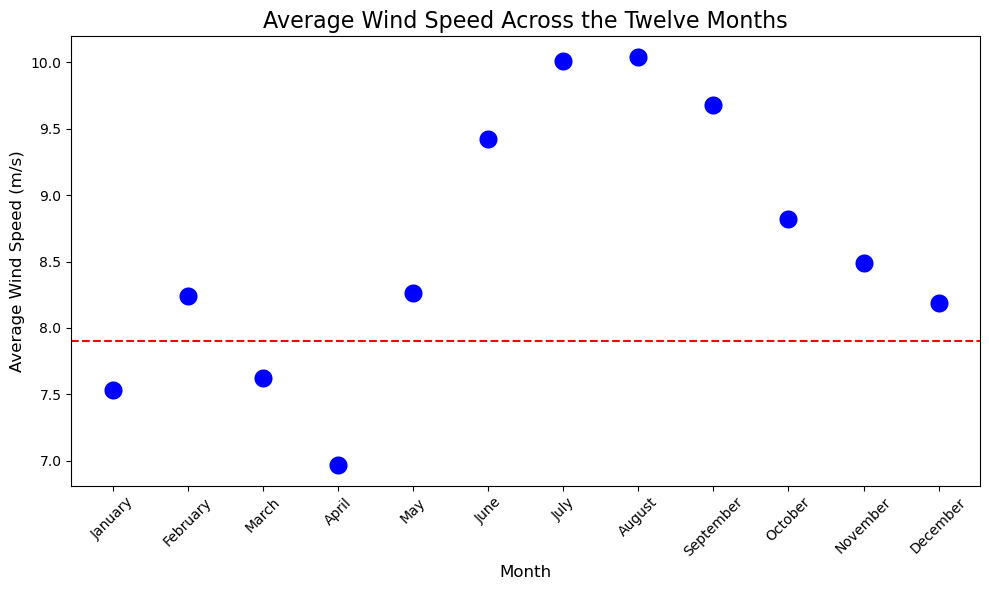

In [47]:
# Calculate average wind speed for each month
monthly_avg_wspd = df_armenia.groupby('month')['wspd'].mean().reset_index()

# Ensure the months are in calendar order
monthly_avg_wspd['month'] = pd.Categorical(monthly_avg_wspd['month'], categories=pd.date_range("2024-01-01", periods=12, freq='M').strftime('%B'), ordered=True)

# Sort the DataFrame to keep the months in order
monthly_avg_wspd = monthly_avg_wspd.sort_values('month')

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Scatter plot showing the average wind speed for each month
sns.scatterplot(x='month', y='wspd', data=monthly_avg_wspd, s=200, color='blue', marker='o')

# Add titles and labels
plt.title('Average Wind Speed Across the Twelve Months', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Wind Speed (m/s)', fontsize=12)
plt.xticks(rotation=45)  # Rotate month labels for better readability

# Cutoff horizontal line at 7.9 m/s
plt.axhline(y=7.9, color='red', linestyle='--', label='7.9 m/s')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
private_api_key_1 = "8cd9770d46msh2bda7a77ebe30d6p10b83fjsnb5061a8acbd1"

response_1 = requests.get("https://commodities-apised.p.rapidapi.com/v1/supported",
                       headers={
                           "x-rapidapi-host": "x-rapidapi-host: meteostat.p.rapidapi.com",
                           "X-RapidAPI-Key": private_api_key_1 # Add the private_api_key variable
                       })

In [ ]:
print(response_1)